MCMC methods in Julia
Assignment_1
Rachit Bodhare 200283

Q1) Implement a Discrete Inverse Transform sampler for Poisson distribution.
-> I have used Algorithm 3: Iterative version of inverse transformation for Poisson (λ)
1: Draw U ~ U[0,1]
2: Set i = 0, p = e^(-λ), A = p
3: if U < A then
4:     X = i and stop
5: else
6:     Set p = λp/(i + 1), A = A + p, and i = i + 1 goto step 3

In [7]:
function sample_with_poisson(l)
    U = rand()
    p = exp(-l)
    i=0
    A = p
    while true
        if U < A
            return i
        else
            p = ((l*p)/(i+1))
            A = A + p
            i = i + 1
        end
    end
end
l = 10
X_C = []
for u in 1:10000
    append!(X_C, sample_with_poisson(l))
end

   Resolving package versions...
  No Changes to `C:\Users\ganes\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\ganes\.julia\environments\v1.7\Manifest.toml`


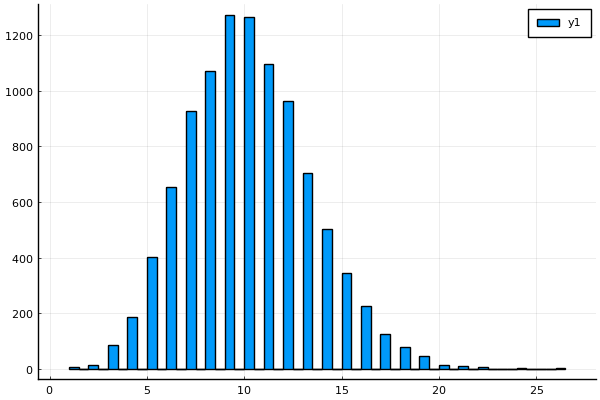

In [8]:
import Pkg; Pkg.add("PyPlot")
using Plots; pyplot()
Plots.PyPlotBackend()
ages = 0:10000;
population = X_C;
histogram(population)

Q2) Implement a Discrete Accept Reject Sampler to simulate draws from Binomial(n, p) using a Poisson proposal.
-> The algorithm is derived in the following paper:
 https://www.jstor.org/stable/2286346
 Section 2.4

In [21]:
function sample_binomial_poisson(n,p,c,l)  
    while true
        U = rand()
        Y = sample_with_poisson(l)
        if(U < ((exp(l)*binomial(BigInt(n),BigInt(Y))*(p^(Y))*((1-p)^(n-Y))*factorial(BigInt(Y)))/BigInt(l^Y))/c)
            return Y
        end
    end 
end
X_D = []
n = 50
p = 0.6
l=n*p
c = findmax(map(x->((exp(l)*binomial(BigInt(n),BigInt(x))*(p^(x))*((1-p)^(n-x))*factorial(BigInt(x)))/(BigInt(l^x))),0:1:n))[1]
for j in 0:10000
    append!(X_D,sample_binomial_poisson(n,p,c,l))
end


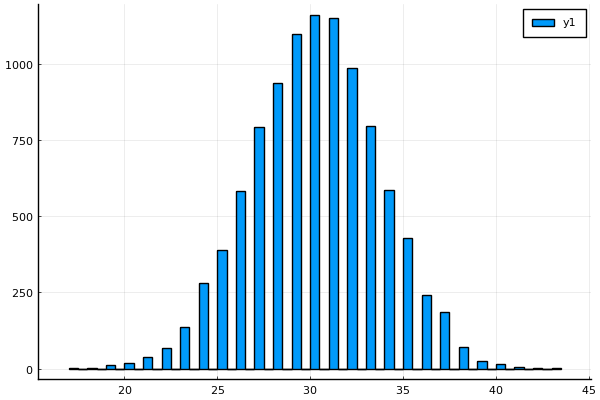

In [22]:
using Plots; pyplot()
Plots.PyPlotBackend()
ages = 0:10000;
population = X_D;
histogram(population)